In [1]:
from pathlib import Path
import torch 
from torchvision import utils 
import math 
from medical_diffusion.models.pipelines import DiffusionPipeline
import logging
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import RandomCrop, Compose, ToPILImage, Resize, ToTensor, Lambda
from medical_diffusion.data.datasets import NiftiPairImageGenerator
import matplotlib.pyplot as plt
from datetime import datetime

/home/local/PARTNERS/rh384/anaconda3/envs/n2n/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.manual_seed(0)
device = torch.device('cuda')

# ------------ Load Model ------------
# pipeline = DiffusionPipeline.load_best_checkpoint(path_run_dir)
# VQVAE /home/local/PARTNERS/rh384/runs/LDM/epoch=1744-step=349000.ckpt
# VQGAN /home/local/PARTNERS/rh384/runs/LDM_VQGAN/2024_01_09_181715/epoch=1739-step=87000.ckpt
pipeline = DiffusionPipeline.load_from_checkpoint("/home/local/PARTNERS/rh384/runs/LDM_VQGAN/2024_01_09_181715/epoch=1739-step=87000.ckpt")
pipeline.to(device)

Setting up [baseline] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/home/local/PARTNERS/rh384/anaconda3/envs/n2n/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/local/PARTNERS/rh384/anaconda3/envs/n2n/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Setting up [baseline] perceptual loss: trunk [vgg], v[0.1], spatial [off]


DiffusionPipeline(
  (loss_fct): L1Loss()
  (noise_scheduler): GaussianNoiseScheduler()
  (noise_estimator): UNet(
    (time_embedder): TimeEmbbeding(
      (pos_embedder): SinusoidalPosEmb()
      (time_emb): Sequential(
        (0): SinusoidalPosEmb()
        (1): Linear(in_features=256, out_features=1024, bias=True)
        (2): Swish()
        (3): Linear(in_features=1024, out_features=1024, bias=True)
      )
    )
    (cond_embedder): Latent_Embedder(
      (perceiver): LPIPS(
        (loss_fn): LPIPS(
          (scaling_layer): ScalingLayer()
          (net): vgg16(
            (slice1): Sequential(
              (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (1): ReLU(inplace=True)
              (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (3): ReLU(inplace=True)
            )
            (slice2): Sequential(
              (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [3]:
inputfolder = "/home/local/PARTNERS/rh384/data/Task107_hecktor2021/labelsTest/"
targetfolder = "/home/local/PARTNERS/rh384/data/Task107_hecktor2021/imagesTest/"
input_size = 128
depth_size = 128
with_condition =  True

transform = Compose([
    Lambda(lambda t: torch.tensor(t).float()),
    Lambda(lambda t: (t * 2) - 1),
    Lambda(lambda t: t.transpose(3, 1)),
])

input_transform = Compose([
    Lambda(lambda t: torch.tensor(t).float()),
    # Lambda(lambda t: (t * 2) - 1),
    Lambda(lambda t: t.transpose(3, 1)),
])

# ----------------Settings --------------
batch_size = 1
max_samples = None # set to None for all 
target_class = None # None for no specific class 
# path_out = Path.cwd()/'results'/'MSIvsMSS_2'/'metrics'
# path_out = Path.cwd()/'results'/'AIROGS'/'metrics'
path_out = Path.cwd()/'results'/'metrics'/'LDM_VQGAN'/ '87k'
path_out.mkdir(parents=True, exist_ok=True)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# ----------------- Logging -----------
current_time = datetime.now().strftime("%Y_%m_%d_%H%M%S")
logger = logging.getLogger()
logging.basicConfig(level=logging.INFO)
logger.addHandler(logging.FileHandler(path_out/f'metrics_{current_time}.log', 'w'))

# ---------------- Dataset/Dataloader ----------------
dataset = NiftiPairImageGenerator(
    inputfolder,
    targetfolder,
    input_size=input_size,
    depth_size=depth_size,
    transform=input_transform if with_condition else transform,
    target_transform=transform,
    full_channel_mask=True
)


dl = DataLoader(dataset, batch_size = 1, shuffle=False, num_workers=1, pin_memory=True)

In [4]:
print(Path(path_out))

/home/local/PARTNERS/rh384/workspace/medfusion/scripts/results/metrics/LDM_VQGAN/87k


tensor(1.)
tensor(-1.)


2024-01-11 14:29:28.820 
  command:

    streamlit run /home/local/PARTNERS/rh384/anaconda3/envs/n2n/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]
250it [00:10, 23.84it/s]


tensor(1.)
tensor(-0.9999)


250it [00:15, 15.78it/s]


tensor(1.)
tensor(-0.9999)


250it [00:12, 20.11it/s]


tensor(1.)
tensor(-1.)


250it [00:12, 20.06it/s]


tensor(1.)
tensor(-0.9998)


250it [00:08, 28.68it/s]


tensor(1.)
tensor(-1.)


250it [00:08, 29.21it/s]


tensor(1.)
tensor(-1.)


250it [00:15, 15.77it/s]


tensor(1.)
tensor(-1.)


250it [00:09, 27.03it/s]


tensor(1.)
tensor(-1.)


250it [00:15, 16.36it/s]


tensor(1.)
tensor(-1.)


250it [00:14, 17.54it/s]


tensor(1.)
tensor(-1.)


250it [00:11, 22.53it/s]
/tmp/ipykernel_757662/481402802.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(nrows=1, ncols=3)


tensor(1.)
tensor(-1.)


250it [00:08, 28.37it/s]


tensor(1.)
tensor(-1.)


250it [00:08, 28.15it/s]


tensor(1.)
tensor(-1.)


250it [00:16, 14.75it/s]


tensor(1.)
tensor(-1.)


250it [00:14, 17.54it/s]


tensor(1.)
tensor(-1.)


250it [00:10, 23.78it/s]


tensor(1.)
tensor(-1.)


250it [00:16, 14.71it/s]


tensor(1.)
tensor(-1.)


250it [00:09, 25.74it/s]


tensor(1.)
tensor(-1.)


250it [00:08, 28.04it/s]


tensor(1.)
tensor(-1.)


250it [00:12, 20.08it/s]


tensor(1.)
tensor(-0.9999)


250it [00:11, 21.17it/s]


tensor(1.)
tensor(-1.)


250it [00:17, 14.69it/s]


tensor(1.)
tensor(-1.)


250it [00:10, 23.70it/s]


tensor(1.)
tensor(-1.)


250it [00:14, 17.27it/s]


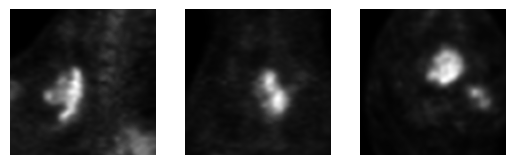

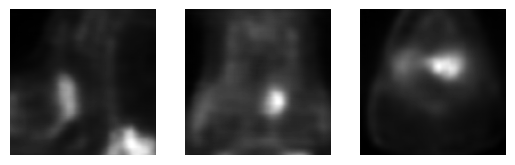

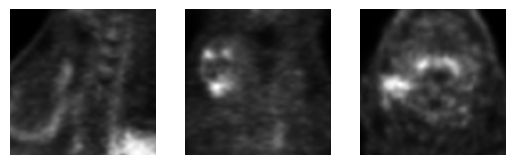

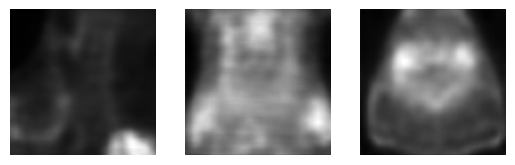

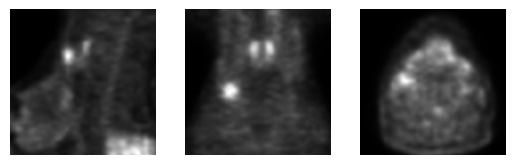

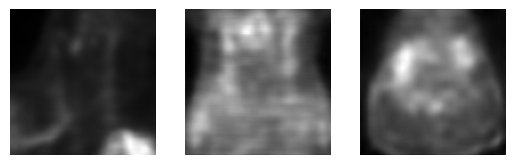

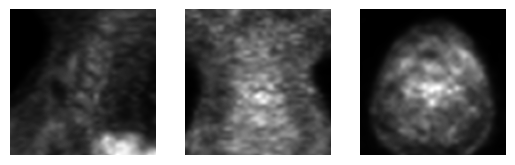

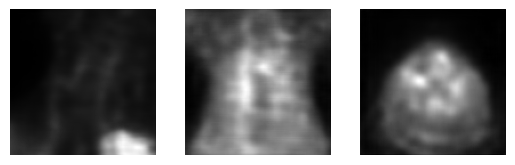

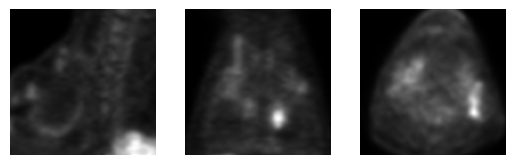

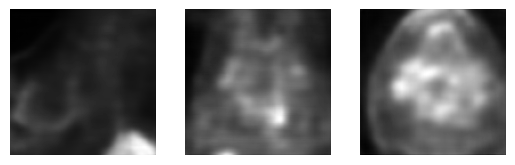

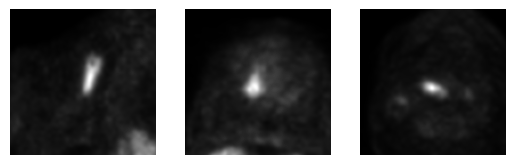

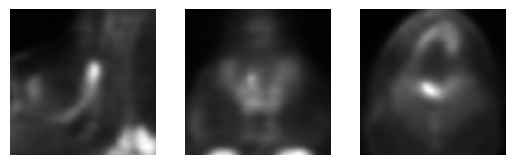

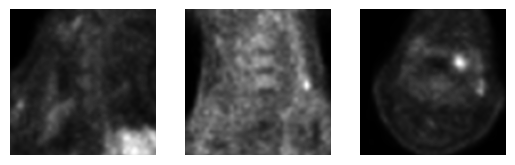

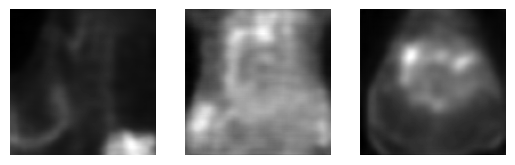

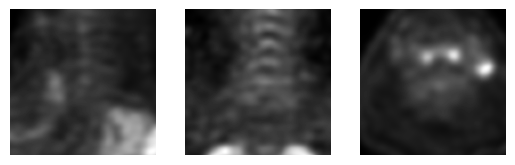

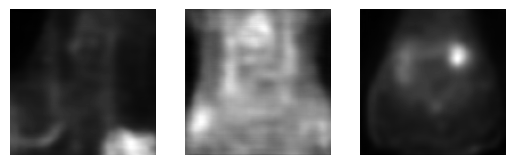

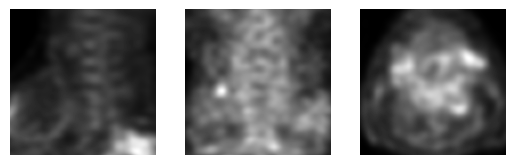

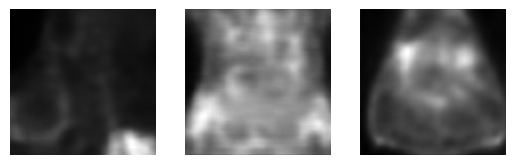

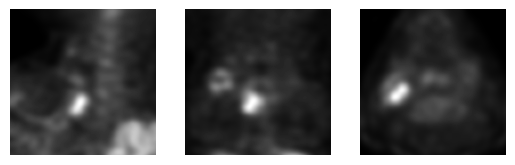

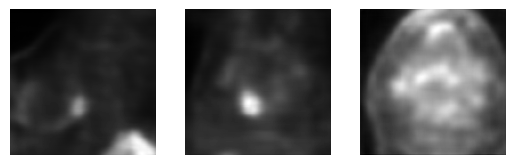

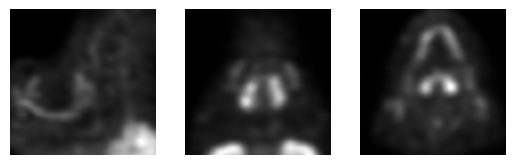

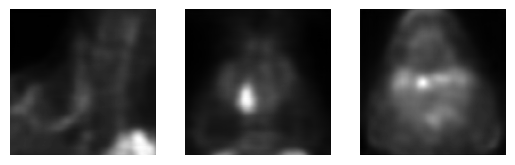

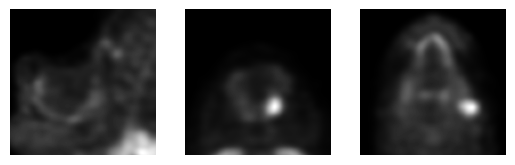

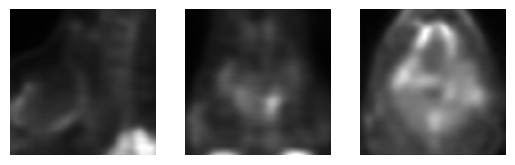

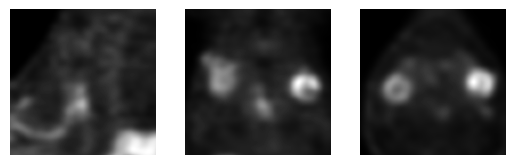

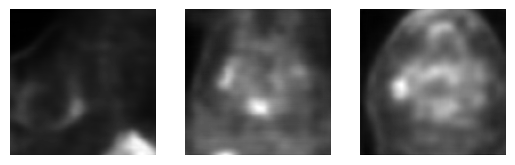

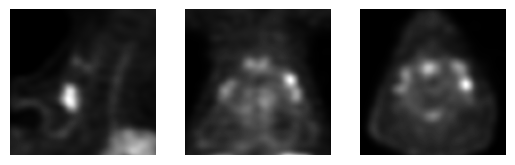

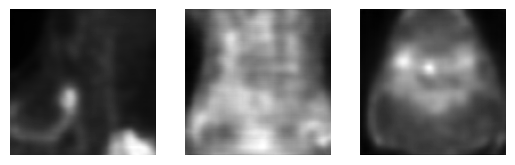

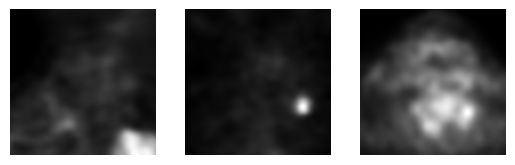

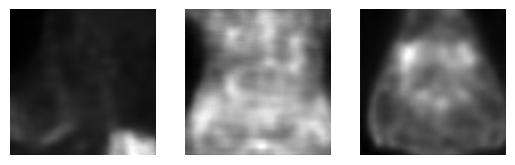

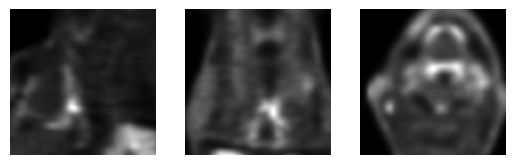

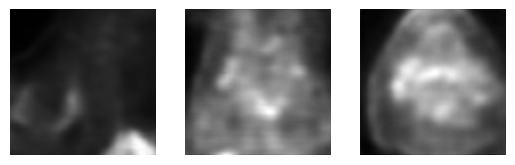

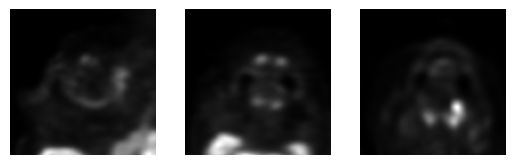

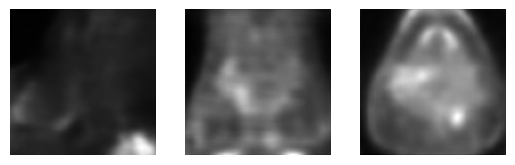

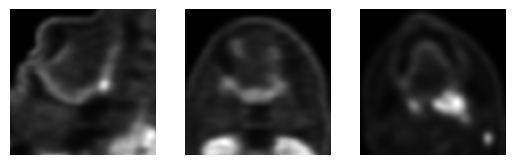

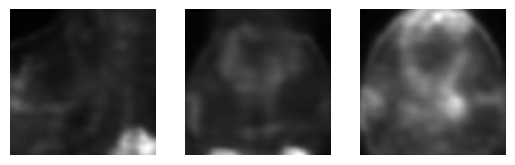

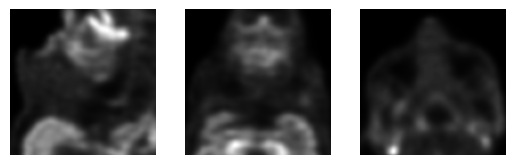

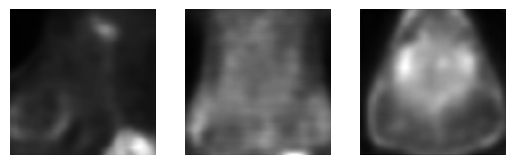

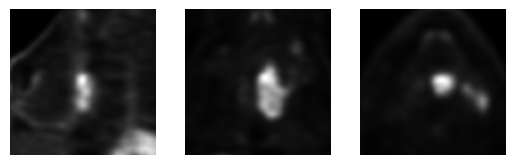

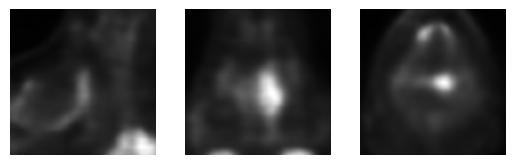

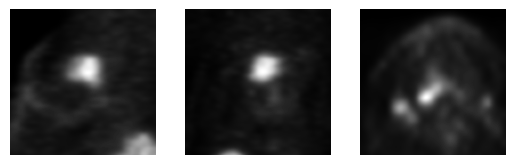

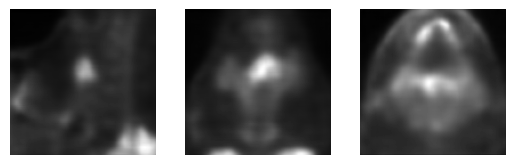

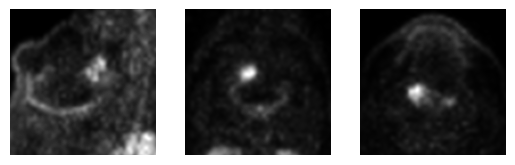

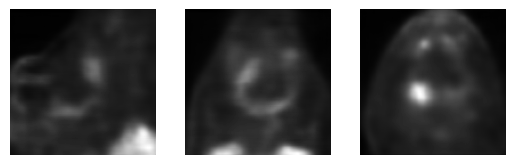

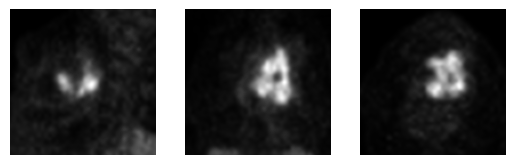

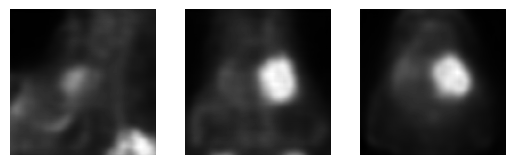

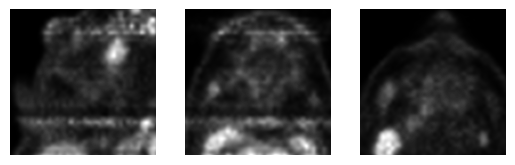

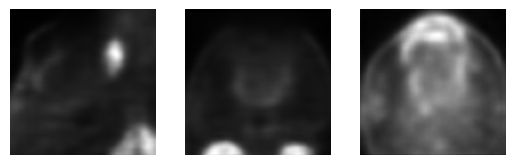

In [5]:
import numpy as np
import nibabel as nib

# --------- Generate Samples  -------------------
steps = 250
use_ddim = True 
images = {}
n_samples = 1

for i,batch in enumerate(dl):
    # batch = next(iter(dl))
    torch.manual_seed(0)
    x_0 = batch['target']
    condition = batch['input'].cuda()
    print(x_0.max())
    print(x_0.min())

    x_0 = (x_0 + 1) / 2
    target_img1 = x_0.squeeze(0).squeeze(0).detach().cpu().numpy()
    condition_img1 = condition.squeeze(0).squeeze(0).detach().cpu().numpy()
    nifti_img_t = nib.Nifti1Image(target_img1, affine = np.eye(4))
    nib.save(nifti_img_t, path_out/f'target_{i}.nii.gz')  
    
    nifti_img_c = nib.Nifti1Image(condition_img1, affine = np.eye(4))
    nib.save(nifti_img_c, path_out/f'mask_{i}.nii.gz')  

    # --------- Conditioning ---------
    # un_cond = torch.tensor([1-cond]*n_samples, device=device)
    un_cond = None 

    # ----------- Run --------
    results = pipeline.sample(n_samples, (4, 16, 16, 16), condition=condition, un_cond = un_cond, guidance_scale=1,  steps=steps, use_ddim=use_ddim )
    # results = pipeline.sample(n_samples, (4, 64, 64), guidance_scale=1, condition=condition, un_cond=un_cond, steps=steps, use_ddim=use_ddim )

    # --------- Save result ---------------
    
    results = (results+1)/2  # Transform from [-1, 1] to [0, 1]
    results = results.clamp(0, 1)
    path_out = Path(path_out)
    path_out.mkdir(parents=True, exist_ok=True)
    # for 3D images use depth as batch :[D, C, H, W], never show more than 32 images 
    sample_img1 = results.squeeze(0).squeeze(0).detach().cpu().numpy()
    
    nifti_img_s = nib.Nifti1Image(sample_img1, affine = np.eye(4))

    nib.save(nifti_img_s, path_out/f'sample_{i}.nii.gz')  



    img = x_0[0, 0,:,:,:]
    fake = results[0, 0,:,:,:]

    img = img.cpu().numpy()
    fake = fake.cpu().numpy()
    fig, axs = plt.subplots(nrows=1, ncols=3)
    for ax in axs:
        ax.axis("off")
    ax = axs[0]
    ax.imshow(img[..., img.shape[2] // 2], cmap="gray")
    ax = axs[1]
    ax.imshow(img[:, img.shape[1] // 2, ...], cmap="gray")
    ax = axs[2]
    ax.imshow(img[img.shape[0] // 2, ...], cmap="gray")

    fig, axs = plt.subplots(nrows=1, ncols=3)
    for ax in axs:
        ax.axis("off")
    ax = axs[0]
    ax.imshow(fake[..., fake.shape[2] // 2], cmap="gray")
    ax = axs[1]
    ax.imshow(fake[:, fake.shape[1] // 2, ...], cmap="gray")
    ax = axs[2]
    ax.imshow(fake[fake.shape[0] // 2, ...], cmap="gray")




In [6]:
print(results.min())

tensor(0., device='cuda:0')
